<a href="https://colab.research.google.com/github/fauziahs13/portfolio_Dec2024/blob/main/Aggregate_%26_Merge_Data_with_Pandas_Analyse_the_LEGO_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

# Import Statements

## Import Statement

<img src="https://i.imgur.com/49FNOHj.jpg">

In [ ]:
import pandas as pd
import matplotlib.pyplot as matpy

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [ ]:
colors = pd.read_csv('data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
colors.shape

(135, 4)

In [ ]:
colors.nunique(axis=0)

,0
id,135
name,135
rgb,124
is_trans,2


In [ ]:
colors['name'].nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
colors.is_trans.value_counts()

,count
is_trans,
f,107
t,28


**Challenge**: Change this into an h3 section heading:
### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<!-- **Challenge**: Display this image:  -->
<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<!-- **Challenge**: Display this image  -->
<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [ ]:
sets = pd.read_csv('data/sets.csv')
print(sets.head())
sets.tail()

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [ ]:
sets.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
sets.sort_values('year')

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [ ]:
sets.groupby('num_parts').max()

,set_num,name,year,theme_id
num_parts,,,,
0,wwgp1-1,Zoo Super Pack 4 in 1,2021,708
1,tech007promo-1,racer polybag,2020,706
2,legobricks-1,Yoda Magnet,2020,695
3,sw117promo-1,Yellow Car,2019,702
4,SWDVDBD-1,Zoo Van (Animal Transporter),2020,702
...,...,...,...,...
5922,10189-1,Taj Mahal,2008,673
5923,10256-1,Taj Mahal,2017,673
6020,71043-1,Hogwarts Castle,2018,246


In [ ]:
sets.num_parts.max()

9987

In [ ]:
top5_parts = sets.sort_values('num_parts', ascending=False)
top5_parts.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year.
= Having summed the number of LEGO sets per year, visualise this data using a line chart with Matplotlib.

How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [ ]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28


In [ ]:
sets_by_year['set_num'].tail()

,set_num
year,
2017,786
2018,816
2019,840
2020,674
2021,3


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

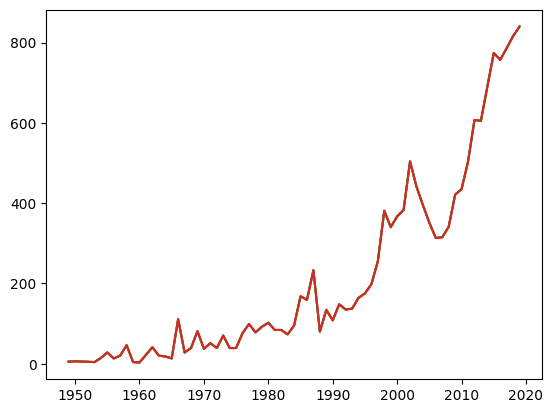

In [ ]:
matpy.plot(sets_by_year[ :-2])

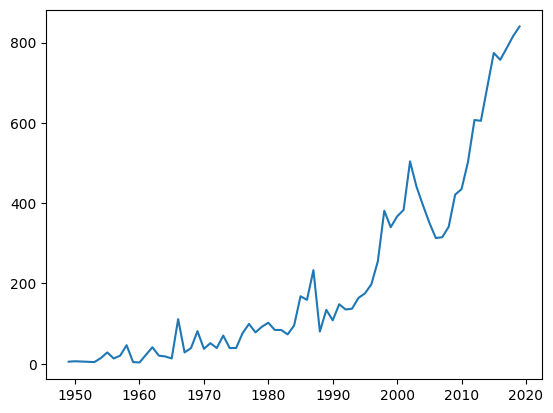

In [ ]:
matpy.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

#### INSIGHT = *We also see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.*

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
themes_by_year = sets.groupby('year').agg({'theme_id' : pd.Series.nunique})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


#### INSIGHT = *Here we can see that LEGO only had 2 themes during the first few years, but just like the number of sets the number of themes expanded manifold over the years.*

In [ ]:
total_themes = sets['theme_id'].nunique()
# colors['name'].nunique()
themes_by_year_2 = sets.groupby('year').agg({'theme_id' : total_themes})
themes_by_year_2.head()

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

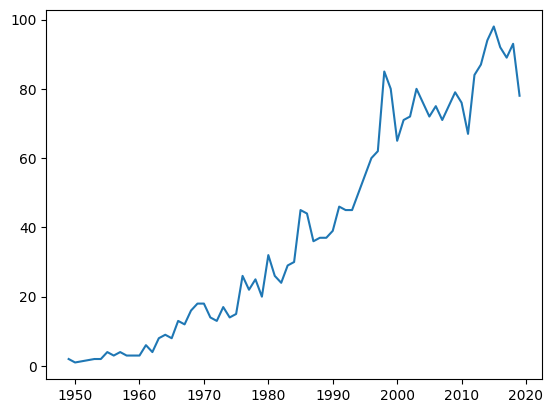

In [ ]:
matpy.plot(themes_by_year[:-2])

### Line Charts with Two Seperate Axes

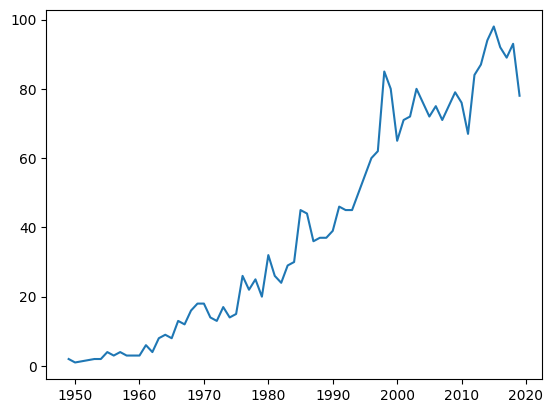

In [ ]:
matpy.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Text(0, 0.5, 'Number of Themes')

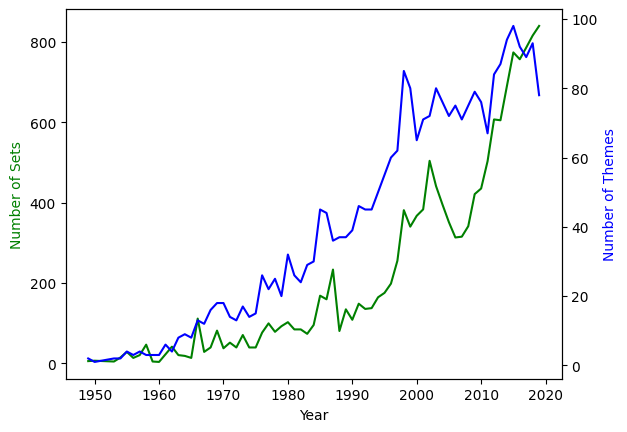

In [ ]:
ax1 = matpy.gca() # get current axis
ax2 = ax1.twinx() # create another axis theat shares the same x-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [ ]:
mean_parts_per_set_by_year = sets.groupby('year').agg({'num_parts' : pd.Series.mean})
mean_parts_per_set_by_year

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


In [ ]:
# mean_parts_per_set_by_year.rename(columns={'numb_parts':'average_numb_parts'}, inplace=True)
mean_parts_per_set_by_year.rename(columns={'average numb_parts':'average_numb_parts'}, inplace=True)
mean_parts_per_set_by_year.head()

,average_numb_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

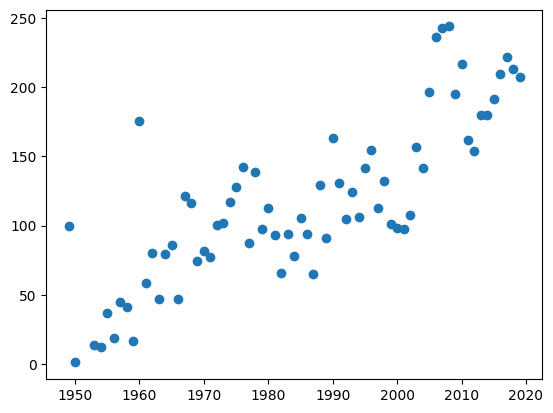

In [ ]:
matpy.scatter(mean_parts_per_set_by_year.index[:-2], mean_parts_per_set_by_year.average_numb_parts[:-2])

#### INSIGHT = *From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.*

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [ ]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count.head()

,count
theme_id,
158,753
501,656
494,398
435,356
503,329


*We have no idea what our themes are actually called! 🤨 Ok, we can see that the theme with id 158 is the largest theme containing 753 individual sets, but what's that theme called? This is not very helpful. We need to find the names of the themes based on the theme_id from the themes.csv file.*

In [ ]:
set_theme_count_2 = sets.groupby('theme_id').count()
set_theme_count_2.sort_values(by='set_num', ascending=False)

,set_num,name,year,num_parts
theme_id,,,,
158,753,753,753,753
501,656,656,656,656
494,398,398,398,398
435,356,356,356,356
503,329,329,329,329
...,...,...,...,...
212,1,1,1,1
210,1,1,1,1
200,1,1,1,1


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png
<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

In [ ]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv?

In [ ]:
themes[themes.name == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [ ]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


#### INSIGHT = *Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters.*

In [ ]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


#### INSIGHT = *Here we see that all of the Star Wars Advent Calendars share the same theme_id.*

In [ ]:
print(sets[sets.theme_id == 261])
sets[sets.theme_id == 158]

      set_num                      name  year  theme_id  num_parts
14630  9748-1       Droid Developer Kit  1999       261        658
14636  9754-1  Dark Side Developers Kit  2000       261        578


,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
new_set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values})
new_set_theme_count[:5]

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [ ]:
# merged_df = pd.merge(themes, new_set_theme_count, on='id')
# merged_df[:3]

In [ ]:
merged_df = pd.merge(new_set_theme_count, themes, on='id')
merged_df[:10]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
5,505,328,Basic Set,504.0
6,497,310,Books,NaN
7,632,299,Town,504.0
8,371,273,Supplemental,365.0
9,516,248,Duplo and Explore,507.0


<BarContainer object of 10 artists>

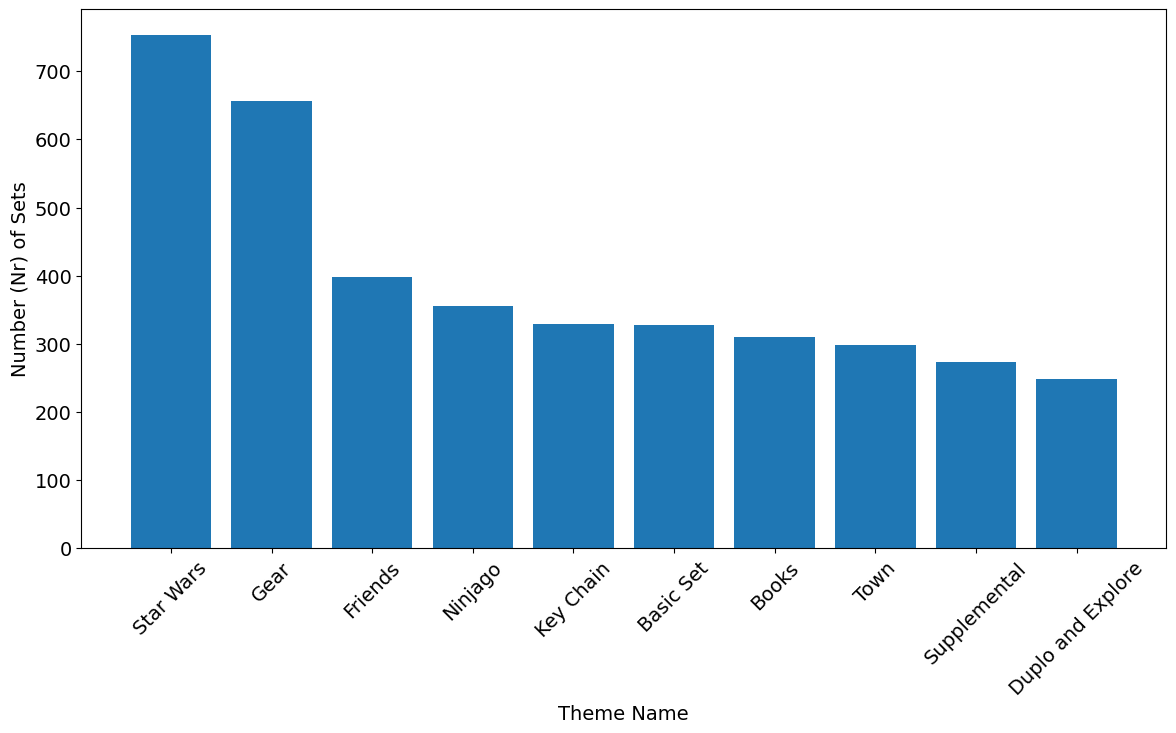

In [ ]:
matpy.figure(figsize=(14,7))
matpy.xticks(fontsize=14, rotation=45)
matpy.yticks(fontsize=14)
matpy.ylabel('Number (Nr) of Sets', fontsize=14)
matpy.xlabel('Theme Name', fontsize=14)

matpy.bar(merged_df.name[:10], merged_df.set_count[:10])

#### INSIGHT = *it's interesting that the LEGO company seems to produce so much more these days than just plastic bricks. The 'Gear' category itself is huge and includes everything from bags to pencil cases apparently. Has LEGO strayed from its core business or is it successfully diversifying? That we can't answer from our dataset. I'll leave that one up to a business school case study to decide. 🤷‍♀️*